In [1]:
import pandas as pd
import seaborn as sns

In [2]:
animals_df = pd.read_csv("animals_df.csv")

## Exploring the DataFrame

In [3]:
animals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576 entries, 0 to 1575
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1576 non-null   object 
 1   Scientific Name    1576 non-null   object 
 2   Class              1576 non-null   object 
 3   Family             1576 non-null   object 
 4   Lifespan (years)   1512 non-null   float64
 5   Top Speed (km/h)   574 non-null    float64
 6   Weight (kg)        1460 non-null   float64
 7   Length (cm)        1517 non-null   float64
 8   Diet               1576 non-null   int64  
 9   Population Trend   1576 non-null   int64  
 10  Population Status  1576 non-null   int64  
 11  Mating Behavior    1576 non-null   int64  
 12  Arid Climate       1576 non-null   int64  
 13  Cold Climate       1576 non-null   int64  
 14  Polar Climate      1576 non-null   int64  
 15  Temperate Climate  1576 non-null   int64  
 16  Tropical Climate   1576 

In [4]:
animals_df.describe()

Lifespan (years)  Top Speed (km/h)    Weight (kg)  Length (cm)  \
count       1512.000000        574.000000    1460.000000  1517.000000   
mean          19.493717         48.806620     416.994395    92.909328   
std           15.766720         33.830925    4830.342859   163.556048   
min            1.000000          0.000000       0.000000     0.000000   
25%           10.000000         29.000000       0.254000    28.000000   
50%           16.000000         45.000000       1.853000    53.500000   
75%           24.500000         64.000000      13.500000   100.000000   
max          162.500000        389.000000  130000.000000  2750.000000   

              Diet  Population Trend  Population Status  Mating Behavior  \
count  1576.000000       1576.000000        1576.000000      1576.000000   
mean      1.128807          1.380711           1.212563         0.937817   
std       0.736725          0.875622           0.517498         0.775787   
min       0.000000          0.000000           0.000000         0.000000   
25%       1.000000          1.000000           1.000000         0.000000   
50%       1.000000          1.000000           1.000000         1.000000   
75%       2.000000          2.000000           2.000000         2.000000   
max       3.000000          3.000000           2.000000         2.000000   

       Arid Climate  Cold Climate  Polar Climate  Temperate Climate  \
count   1576.000000   1576.000000    1576.000000        1576.000000   
mean       0.217005      0.176396       0.100254           0.645305   
std        0.412337      0.381278       0.300433           0.478573   
min        0.000000      0.000000       0.000000           0.000000   
25%        0.000000      0.000000       0.000000           0.000000   
50%        0.000000      0.000000       0.000000           1.000000   
75%        0.000000      0.000000       0.000000           1.000000   
max        1.000000      1.000000       1.000000           1.000000   

       Tropical Climate       Africa   Antarctica         Asia       Europe  \
count       1576.000000  1576.000000  1576.000000  1576.000000  1576.000000   
mean           0.669416     0.284264     0.037437     0.365482     0.166244   
std            0.470573     0.451206     0.189889     0.481718     0.372417   
min            0.000000     0.000000     0.000000     0.000000     0.000000   
25%            0.000000     0.000000     0.000000     0.000000     0.000000   
50%            1.000000     0.000000     0.000000     0.000000     0.000000   
75%            1.000000     1.000000     0.000000     1.000000     0.000000   
max            1.000000     1.000000     1.000000     1.000000     1.000000   

       North America      Oceania  South America  
count    1576.000000  1576.000000    1576.000000  
mean        0.421954     0.177665       0.233503  
std         0.494028     0.382352       0.423194  
min         0.000000     0.000000       0.000000  
25%         0.000000     0.000000       0.000000  
50%         0.000000     0.000000       0.000000  
75%         1.000000     0.000000       0.000000  
max         1.000000     1.000000       1.000000

In [5]:
animals_df.duplicated().sum()

0

## Missing data

The missing data was handled by placing the mean value by each class of animals.

In [6]:
animals_df.isna().any()

Name                 False
Scientific Name      False
Class                False
Family               False
Lifespan (years)      True
Top Speed (km/h)      True
Weight (kg)           True
Length (cm)           True
Diet                 False
Population Trend     False
Population Status    False
Mating Behavior      False
Arid Climate         False
Cold Climate         False
Polar Climate        False
Temperate Climate    False
Tropical Climate     False
Africa               False
Antarctica           False
Asia                 False
Europe               False
North America        False
Oceania              False
South America        False
dtype: bool

In [7]:
for column in ["Lifespan (years)", "Top Speed (km/h)", "Weight (kg)", "Length (cm)"]:
    aves_mean = animals_df.groupby("Class")[column].mean().values[0]
    mammalia_mean = animals_df.groupby("Class")[column].mean().values[1]
    reptilia_mean = animals_df.groupby("Class")[column].mean().values[2]
    
    animals_df[animals_df["Class"] == "Aves"] = animals_df[animals_df["Class"] == "Aves"].fillna(value = {column: aves_mean})
    animals_df[animals_df["Class"] == "Mammalia"] = animals_df[animals_df["Class"] == "Mammalia"].fillna(value = {column: mammalia_mean})
    animals_df[animals_df["Class"] == "Reptilia"] = animals_df[animals_df["Class"] == "Reptilia"].fillna(value = {column: reptilia_mean})

In [8]:
animals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576 entries, 0 to 1575
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1576 non-null   object 
 1   Scientific Name    1576 non-null   object 
 2   Class              1576 non-null   object 
 3   Family             1576 non-null   object 
 4   Lifespan (years)   1576 non-null   float64
 5   Top Speed (km/h)   1576 non-null   float64
 6   Weight (kg)        1576 non-null   float64
 7   Length (cm)        1576 non-null   float64
 8   Diet               1576 non-null   int64  
 9   Population Trend   1576 non-null   int64  
 10  Population Status  1576 non-null   int64  
 11  Mating Behavior    1576 non-null   int64  
 12  Arid Climate       1576 non-null   int64  
 13  Cold Climate       1576 non-null   int64  
 14  Polar Climate      1576 non-null   int64  
 15  Temperate Climate  1576 non-null   int64  
 16  Tropical Climate   1576 

## Outliers

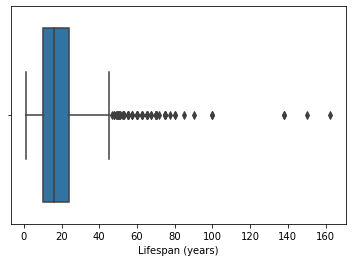

In [9]:
sns.boxplot(animals_df["Lifespan (years)"])

In [10]:
animals_df[animals_df["Lifespan (years)"] >= 100]

Name         Scientific Name     Class  \
22   African Spurred Tortoise    Centrochelys sulcata  Reptilia   
27     Aldabra Giant Tortoise  Aldabrachelys gigantea  Reptilia   
238             Bowhead Whale      Balaena mysticetus  Mammalia   
349         Common Box Turtle      Terrapene carolina  Reptilia   
664            Greek Tortoise          Testudo graeca  Reptilia   
749            Humpback Whale  Megaptera novaeangliae  Mammalia   

              Family  Lifespan (years)  Top Speed (km/h)   Weight (kg)  \
22      Testudinidae             100.0         22.147727    105.000000   
27      Testudinidae             138.0          0.000000    200.000000   
238       Balaenidae             150.0         10.000000  55000.000000   
349         Emydidae             138.0         22.147727     28.274674   
664     Testudinidae             162.5          8.000000      1.000000   
749  Balaenopteridae             100.0         17.000000  27500.000000   

     Length (cm)  Diet  Population Trend  ...  Polar Climate  \
22          83.0     2                 0  ...              0   
27         106.0     2                 0  ...              0   
238       1600.0     1                 3  ...              1   
349         13.0     1                 1  ...              0   
664         16.5     2                 0  ...              0   
749       1450.0     1                 3  ...              1   

     Temperate Climate  Tropical Climate  Africa  Antarctica  Asia  Europe  \
22                   0                 1       1           0     0       0   
27                   0                 1       1           0     0       0   
238                  0                 0       0           0     1       1   
349                  1                 1       0           0     0       0   
664                  1                 0       1           0     1       1   
749                  1                 1       1           1     1       1   

     North America  Oceania  South America  
22               0        0              0  
27               0        0              0  
238              1        0              0  
349              1        0              0  
664              0        0              0  
749              1        1              1  

[6 rows x 24 columns]

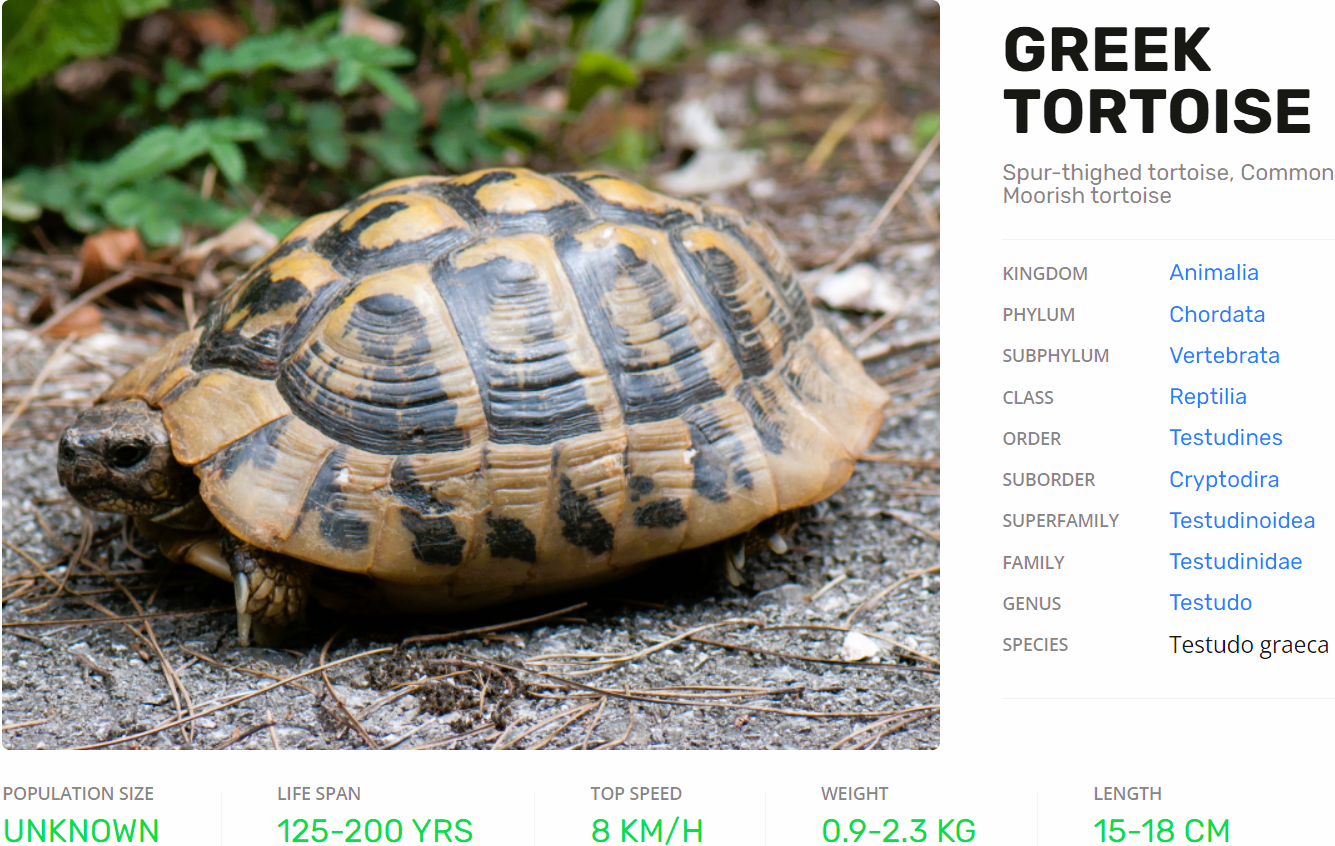

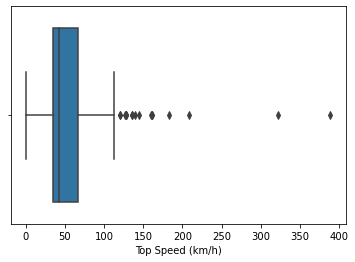

In [11]:
sns.boxplot(animals_df["Top Speed (km/h)"])

In [12]:
animals_df[animals_df["Top Speed (km/h)"] >= 180]

Name   Scientific Name Class        Family  \
695          Gyrfalcon  Falco rusticolus  Aves    Falconidae   
1067  Peregrine Falcon  Falco peregrinus  Aves    Falconidae   
1152          Red Kite     Milvus milvus  Aves  Accipitridae   
1229      Saker Falcon     Falco cherrug  Aves    Falconidae   

      Lifespan (years)  Top Speed (km/h)  Weight (kg)  Length (cm)  Diet  \
695               20.0             209.0        0.404         56.5     1   
1067              22.0             389.0        0.166         46.0     1   
1152              25.0             183.0        0.401         65.0     1   
1229              17.5             322.0        0.365         51.0     1   

      Population Trend  ...  Polar Climate  Temperate Climate  \
695                  2  ...              1                  0   
1067                 2  ...              1                  1   
1152                 1  ...              0                  1   
1229                 1  ...              0                  1   

      Tropical Climate  Africa  Antarctica  Asia  Europe  North America  \
695                  0       0           0     1       1              1   
1067                 1       1           1     1       1              1   
1152                 0       1           0     1       1              0   
1229                 1       1           0     1       1              0   

      Oceania  South America  
695         0              0  
1067        1              1  
1152        0              0  
1229        0              0  

[4 rows x 24 columns]

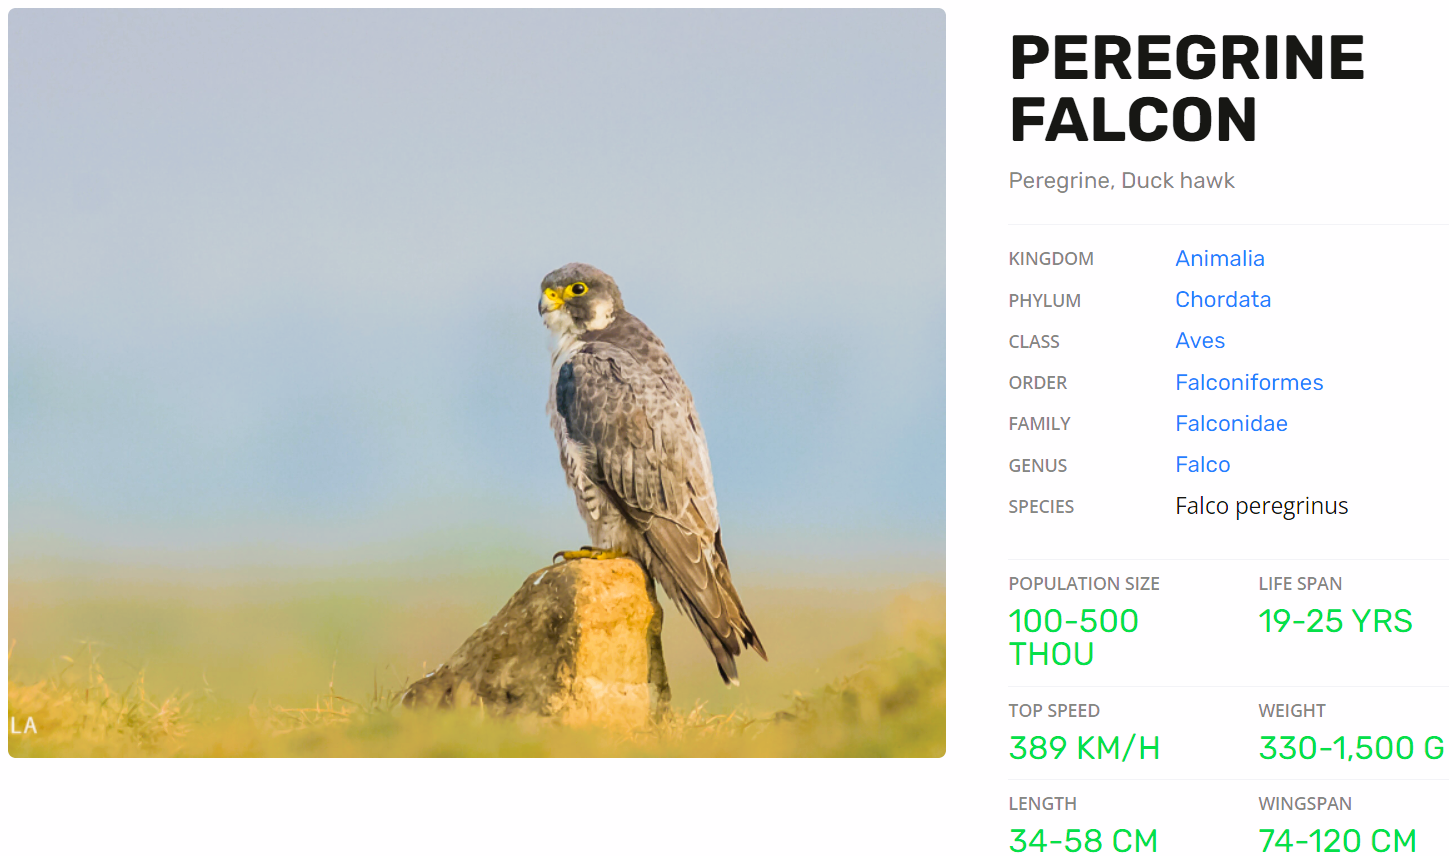

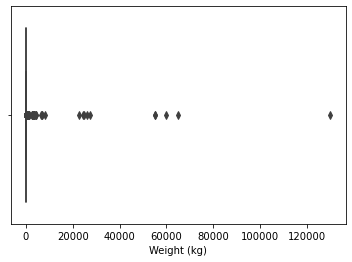

In [13]:
sns.boxplot(animals_df["Weight (kg)"])

In [14]:
animals_df[animals_df["Weight (kg)"] >= 55_000]

Name        Scientific Name     Class  \
219                   Blue Whale  Balaenoptera musculus  Mammalia   
238                Bowhead Whale     Balaena mysticetus  Mammalia   
994   North Atlantic Right Whale    Eubalaena glacialis  Mammalia   
1023   North Pacific Right Whale     Eubalaena japonica  Mammalia   
1328        Southern Right Whale    Eubalaena australis  Mammalia   

               Family  Lifespan (years)  Top Speed (km/h)  Weight (kg)  \
219   Balaenopteridae              55.0              20.0     130000.0   
238        Balaenidae             150.0              10.0      55000.0   
994        Balaenidae              75.0              16.0      55000.0   
1023       Balaenidae              75.0               9.0      65000.0   
1328       Balaenidae              75.0              15.0      60000.0   

      Length (cm)  Diet  Population Trend  ...  Polar Climate  \
219        2750.0     1                 3  ...              1   
238        1600.0     1                 3  ...              1   
994        1450.0     1                 1  ...              1   
1023       1650.0     1                 0  ...              1   
1328       1350.0     1                 3  ...              0   

      Temperate Climate  Tropical Climate  Africa  Antarctica  Asia  Europe  \
219                   1                 1       1           1     1       1   
238                   0                 0       0           0     1       1   
994                   1                 0       0           0     0       1   
1023                  1                 0       0           0     1       0   
1328                  1                 0       1           1     0       0   

      North America  Oceania  South America  
219               1        1              1  
238               1        0              0  
994               1        0              0  
1023              1        0              0  
1328              0        1              1  

[5 rows x 24 columns]

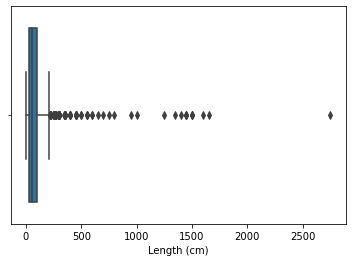

In [15]:
sns.boxplot(animals_df["Length (cm)"])

In [16]:
animals_df[animals_df["Length (cm)"] >= 1_600]

Name        Scientific Name     Class  \
219                  Blue Whale  Balaenoptera musculus  Mammalia   
238               Bowhead Whale     Balaena mysticetus  Mammalia   
1023  North Pacific Right Whale     Eubalaena japonica  Mammalia   

               Family  Lifespan (years)  Top Speed (km/h)  Weight (kg)  \
219   Balaenopteridae              55.0              20.0     130000.0   
238        Balaenidae             150.0              10.0      55000.0   
1023       Balaenidae              75.0               9.0      65000.0   

      Length (cm)  Diet  Population Trend  ...  Polar Climate  \
219        2750.0     1                 3  ...              1   
238        1600.0     1                 3  ...              1   
1023       1650.0     1                 0  ...              1   

      Temperate Climate  Tropical Climate  Africa  Antarctica  Asia  Europe  \
219                   1                 1       1           1     1       1   
238                   0                 0       0           0     1       1   
1023                  1                 0       0           0     1       0   

      North America  Oceania  South America  
219               1        1              1  
238               1        0              0  
1023              1        0              0  

[3 rows x 24 columns]

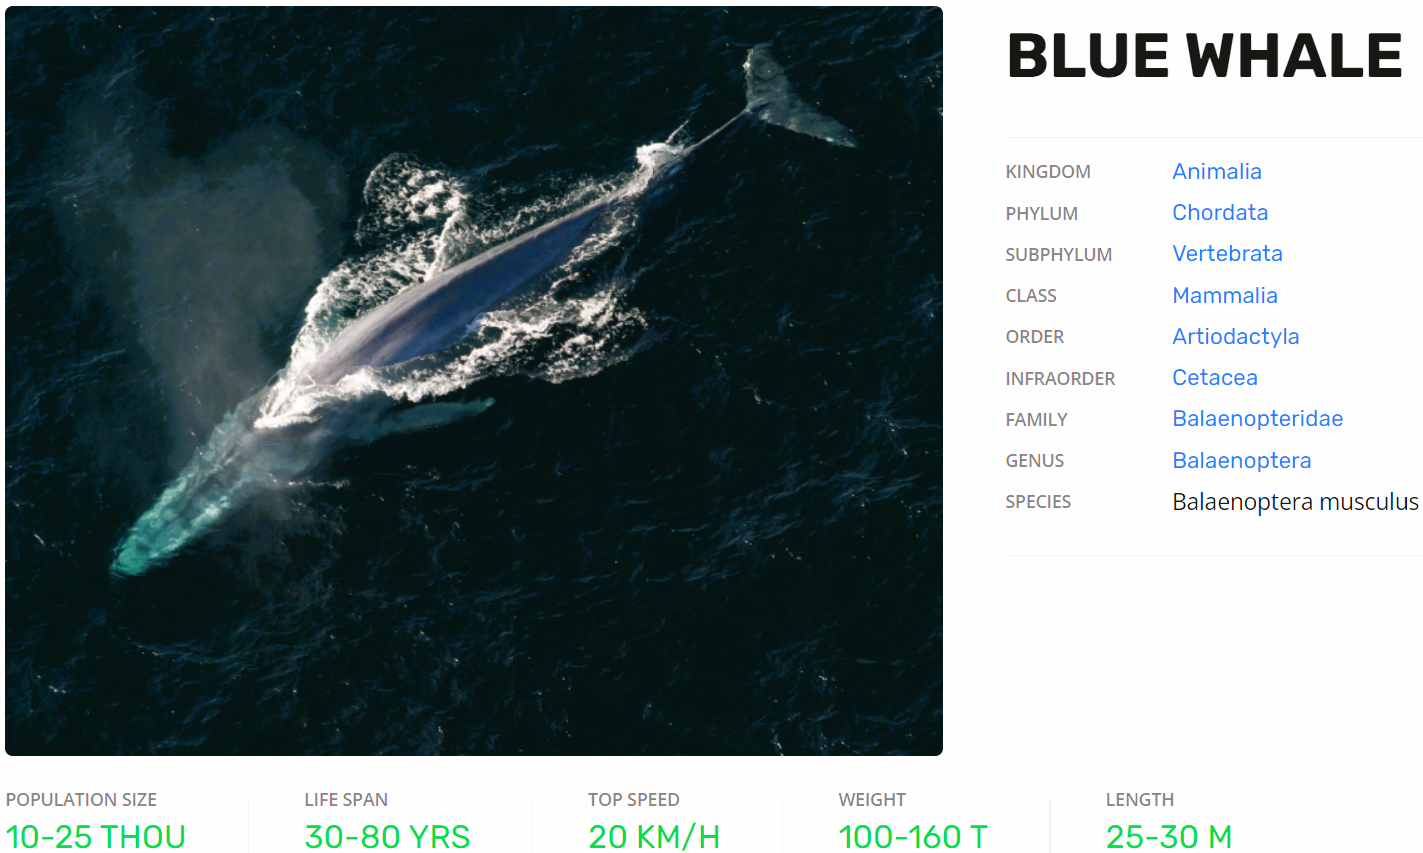

In [17]:
animals_df.to_csv(path_or_buf = "animals_df_updated.csv", index = False)